In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [3]:
df = pd.read_csv('/content/worldwide_coffee_habits.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      10000 non-null  object 
 1   Year                                         10000 non-null  int64  
 2   Coffee Consumption (kg per capita per year)  10000 non-null  float64
 3   Average Coffee Price (USD per kg)            10000 non-null  float64
 4   Type of Coffee Consumed                      10000 non-null  object 
 5   Population (millions)                        10000 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 468.9+ KB


In [6]:
def simple_lineplot(title,data,x,y):
  plt.figure(figsize=(10,6))
  plt.title(title)
  sns.lineplot(data=data,x=x,y=y, marker = 'o')
  plt.xticks(data[x].unique(),rotation=45)
  plt.grid(True)
  plt.show()

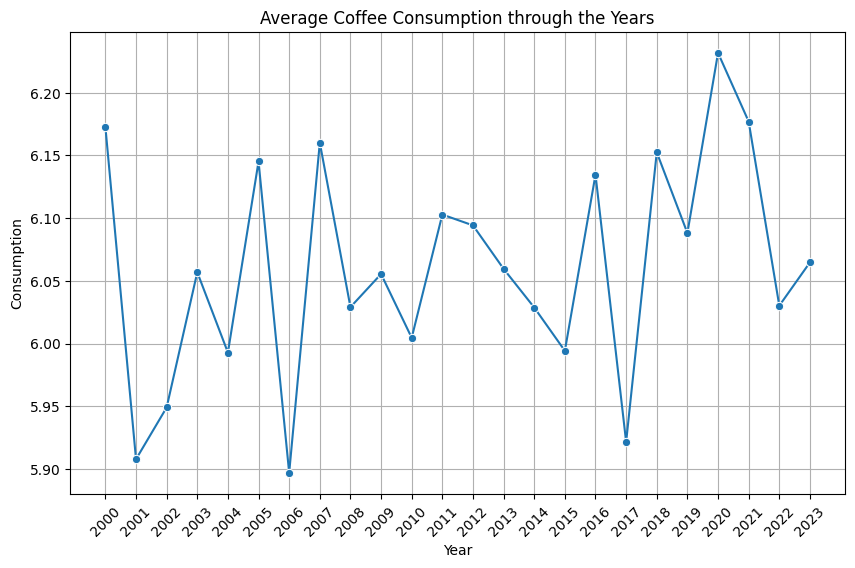

In [11]:
year_mean = lambda data, col, name: data.groupby('Year')[col].mean().reset_index(name=name)

consumption_years = year_mean(df, 'Coffee Consumption (kg per capita per year)', 'Consumption')
simple_lineplot('Average Coffee Consumption through the Years', consumption_years, 'Year', 'Consumption')

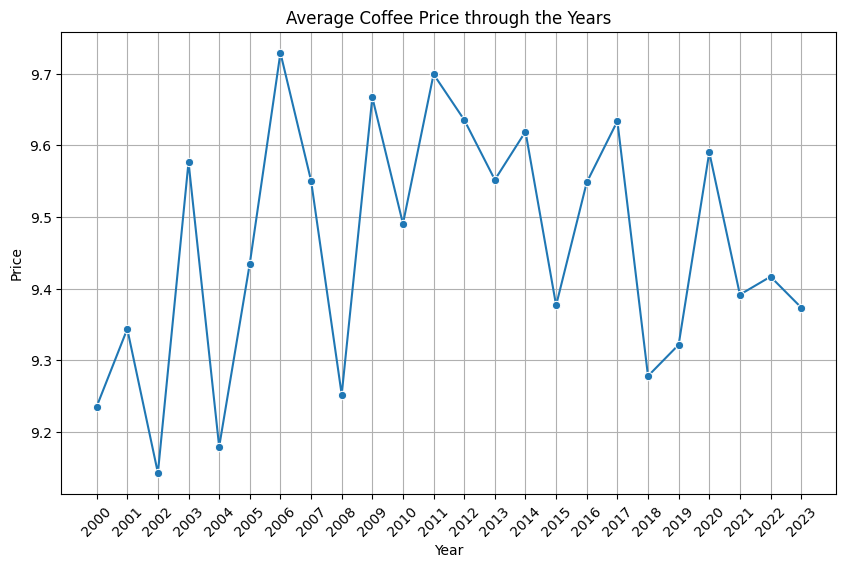

In [12]:
price_years = year_mean(df, 'Average Coffee Price (USD per kg)', 'Price')
simple_lineplot('Average Coffee Price through the Years', price_years, 'Year', 'Price')


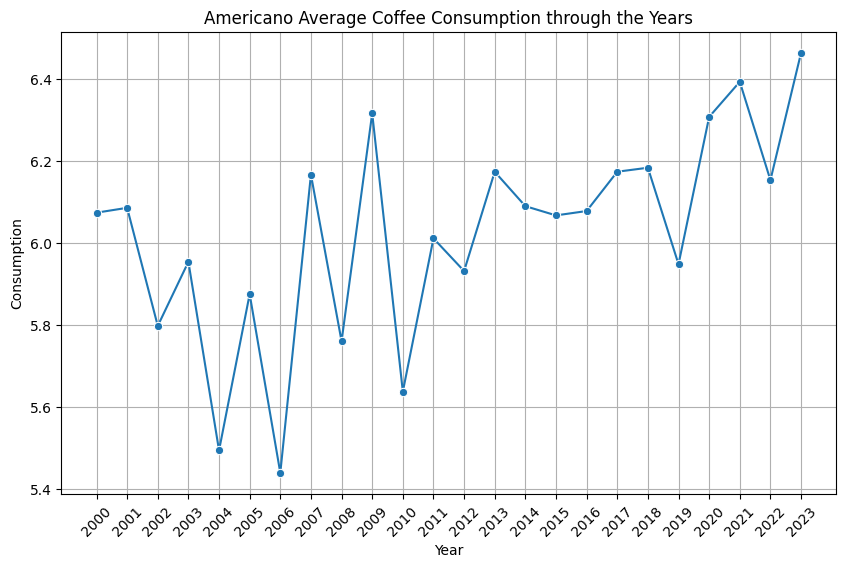

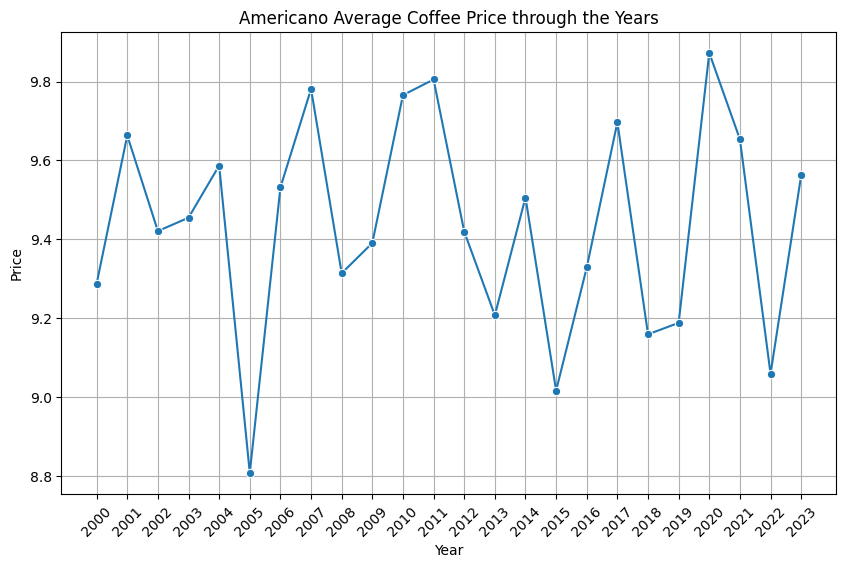

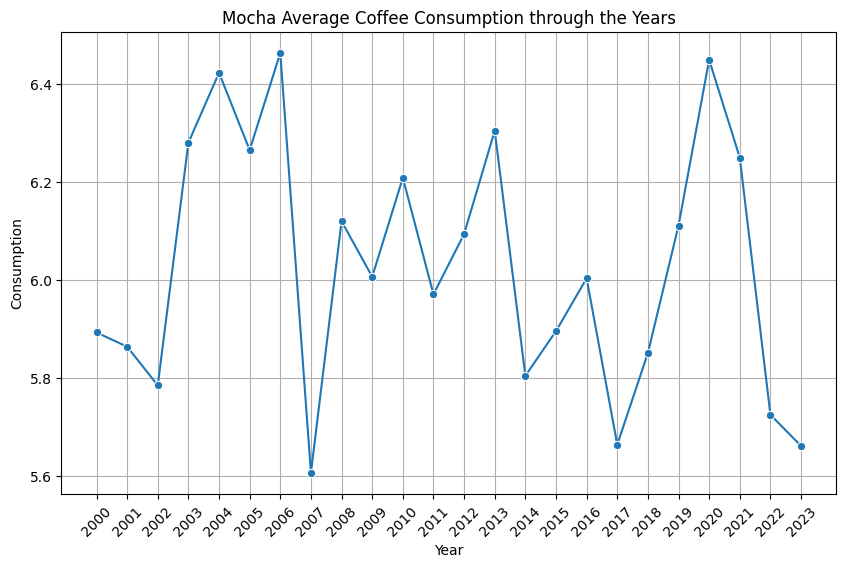

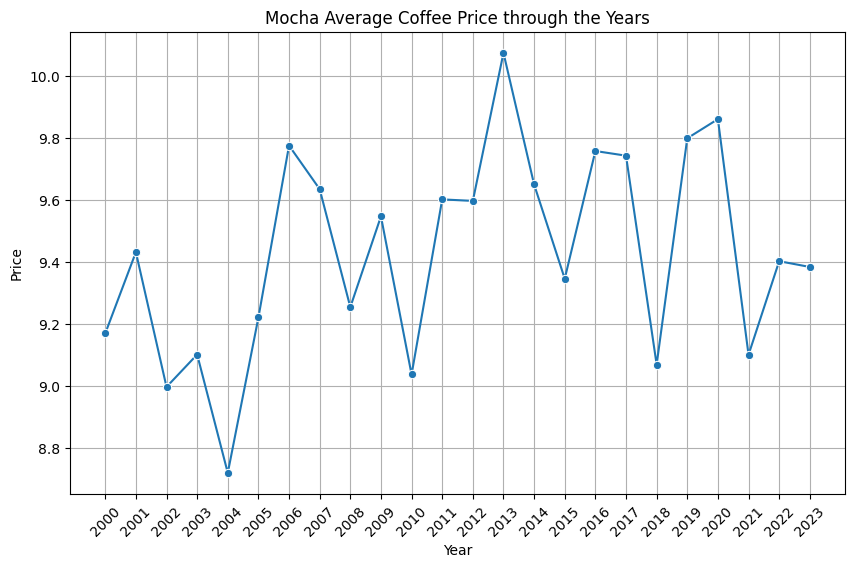

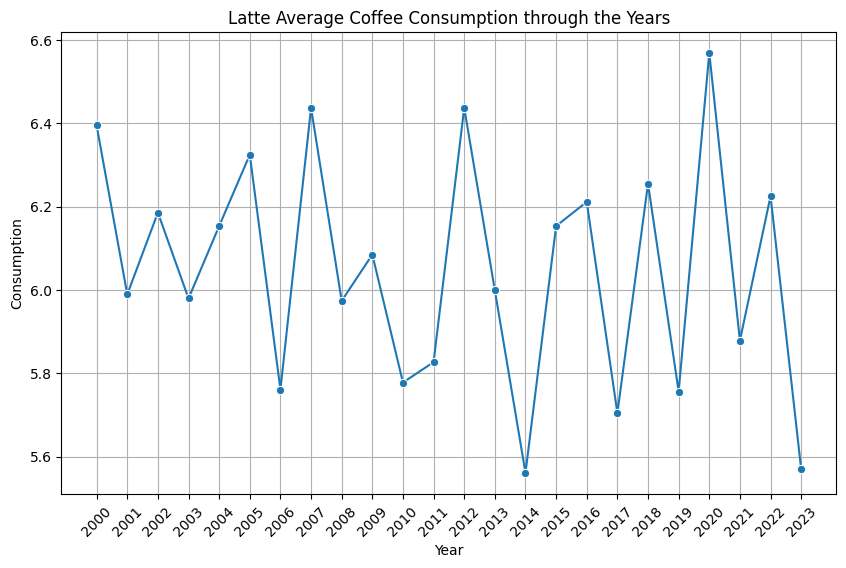

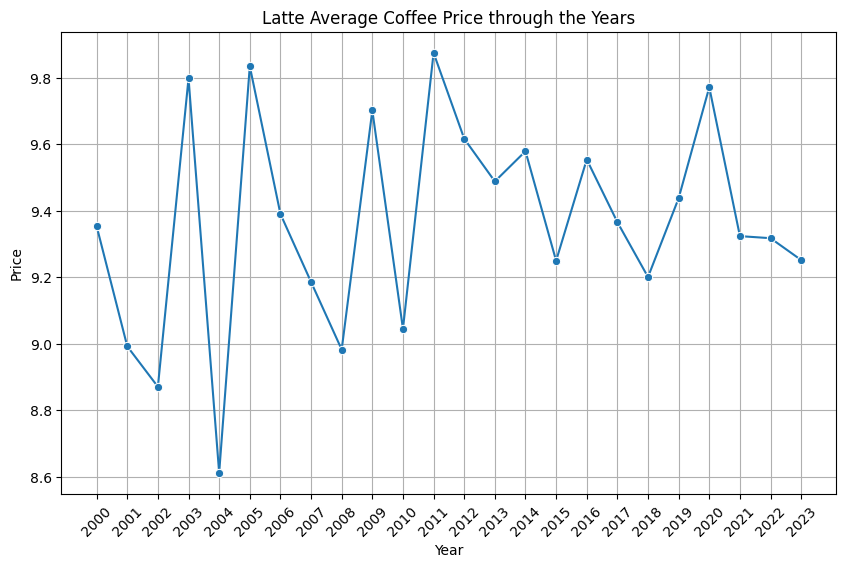

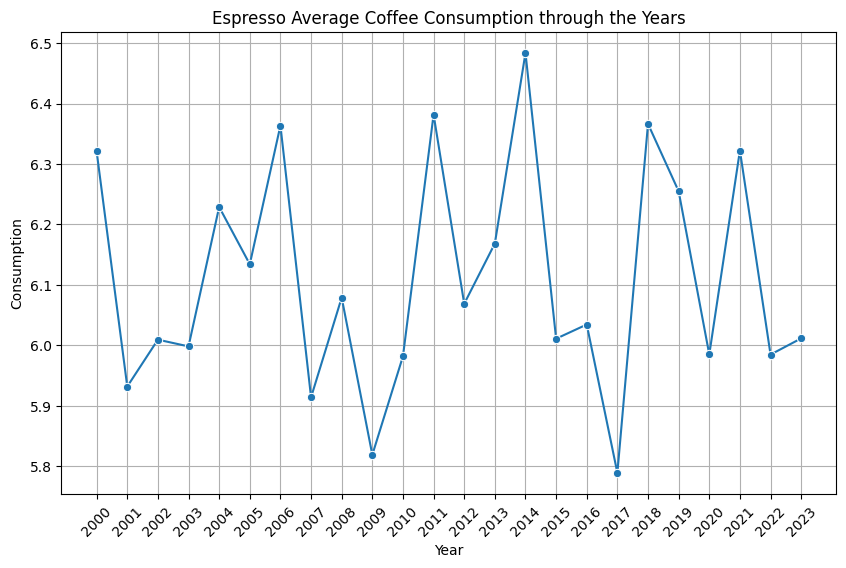

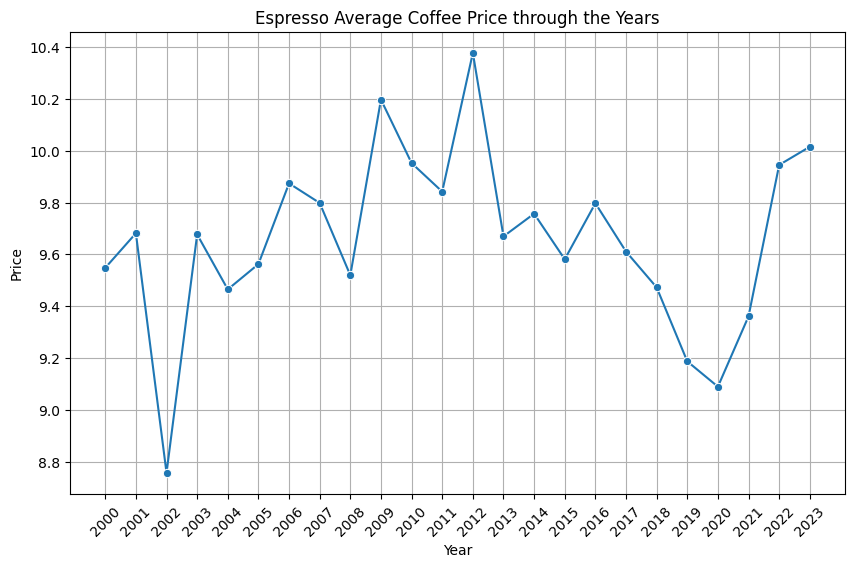

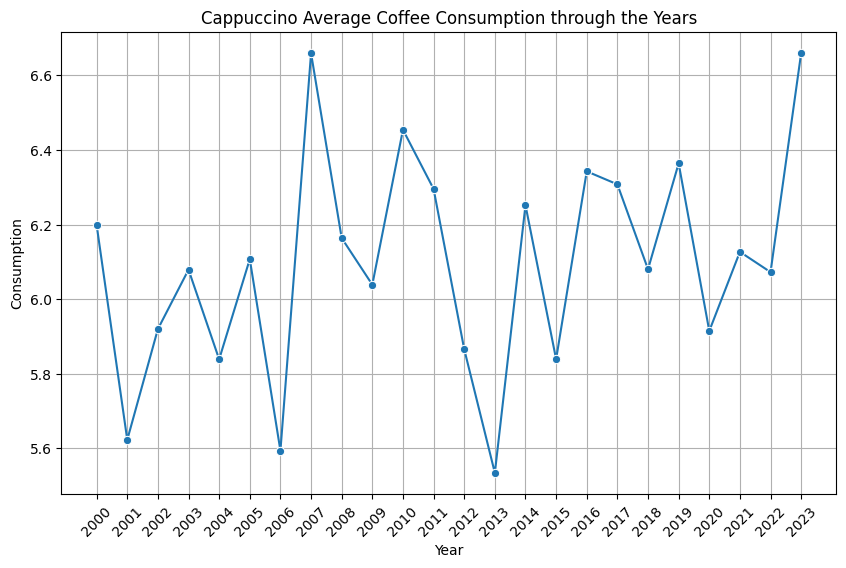

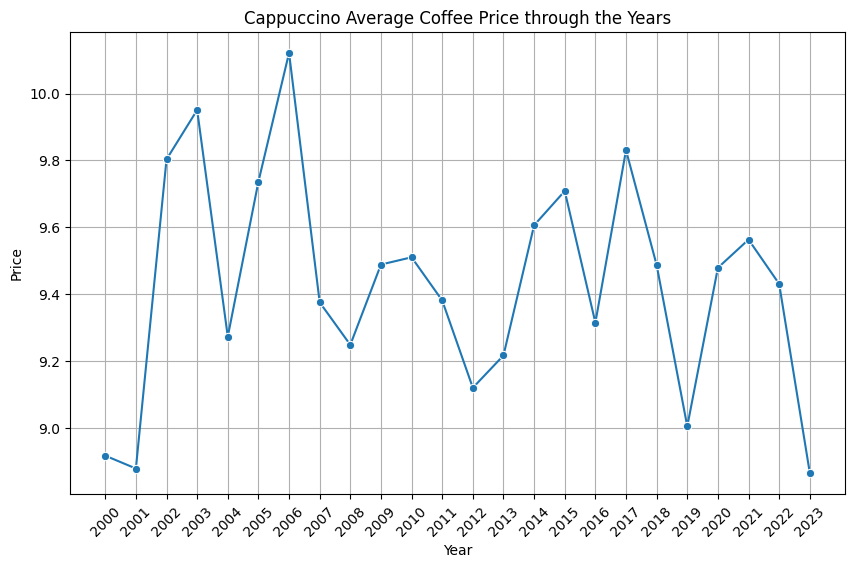

In [13]:
for coffee_type in df['Type of Coffee Consumed'].unique():
    data = df[df['Type of Coffee Consumed'] == coffee_type]

    data_consumption = year_mean(data, 'Coffee Consumption (kg per capita per year)', 'Consumption')
    data_price = year_mean(data, 'Average Coffee Price (USD per kg)', 'Price')

    simple_lineplot(f'{coffee_type} Average Coffee Consumption through the Years', data_consumption, 'Year', 'Consumption')
    simple_lineplot(f'{coffee_type} Average Coffee Price through the Years', data_price, 'Year', 'Price')